In [ ]:
ls

sample_data/  titanic_train.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
titanic_data=pd.read_csv("titanic_train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

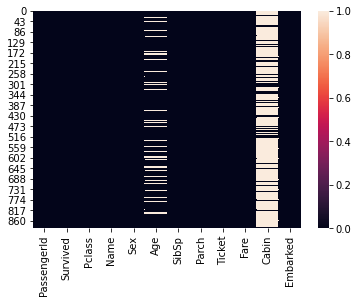

In [ ]:
sns.heatmap(titanic_data.isnull())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


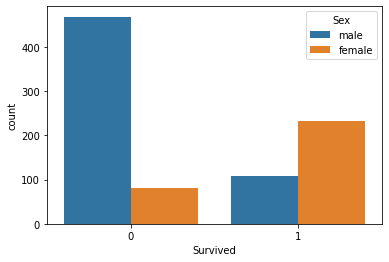

In [ ]:
sns.countplot('Survived',data=titanic_data,hue='Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


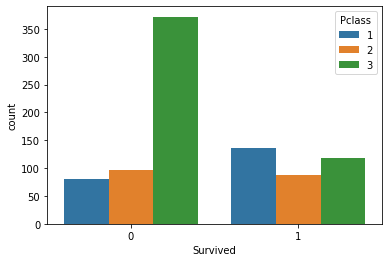

In [ ]:
sns.countplot('Survived',data=titanic_data,hue='Pclass')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


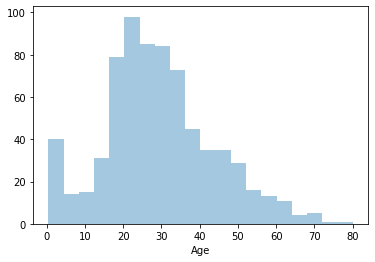

In [ ]:
sns.distplot(titanic_data['Age'],kde=False)

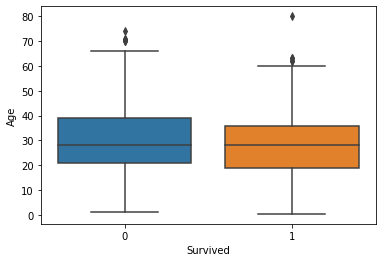

In [ ]:
sns.boxplot(x='Survived',y='Age',data=titanic_data)

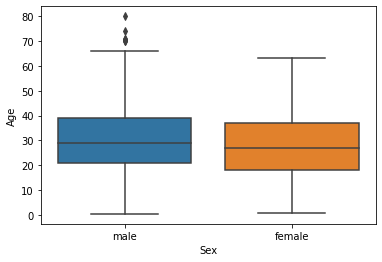

In [ ]:
sns.boxplot(x='Sex',y='Age',data=titanic_data)

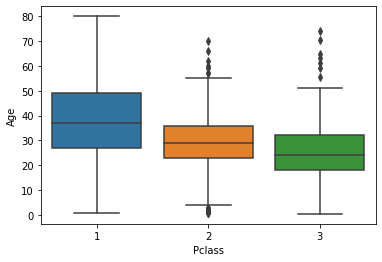

In [ ]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

In [ ]:
def calculateAge(cols):
  Age=cols[0]
  Pclass=cols[1]
  if(pd.isnull(Age)):
    if(Pclass==1):
      Age=40
    elif(Pclass==2):
      Age=30
    else:
      Age=25
  return Age

In [ ]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(calculateAge,axis=1)

In [ ]:
titanic_data['Age'].isnull().sum()

0

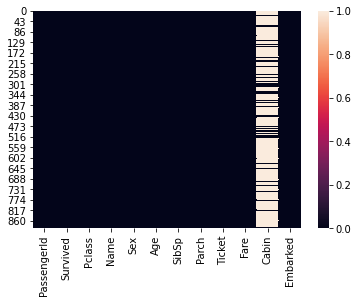

In [ ]:
sns.heatmap(titanic_data.isnull())

In [ ]:
titanic_data.dropna(inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [ ]:
titanic_data=pd.concat([titanic_data,embark,sex],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,1,0


In [ ]:
titanic_data.drop(['Name','Sex','Ticket','Fare','Cabin'],axis=1,inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Q,S,male
1,2,1,1,38.0,1,0,C,0,0,0
3,4,1,1,35.0,1,0,S,0,1,0
6,7,0,1,54.0,0,0,S,0,1,1
10,11,1,3,4.0,1,1,S,0,1,0
11,12,1,1,58.0,0,0,S,0,1,0


In [ ]:
titanic_data['SibSp'].value_counts()

0    124
1     69
2      6
3      3
Name: SibSp, dtype: int64

In [ ]:
titanic_data['Parch'].value_counts()

0    139
1     39
2     23
4      1
Name: Parch, dtype: int64

In [ ]:
SibSp=pd.get_dummies(titanic_data['SibSp'],drop_first=True)
Parch=pd.get_dummies(titanic_data['Parch'],drop_first=True)
titanic_data=pd.concat([titanic_data,SibSp,Parch],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Q,S,male,1,2,3,1,2,4
1,2,1,1,38.0,1,0,C,0,0,0,1,0,0,0,0,0
3,4,1,1,35.0,1,0,S,0,1,0,1,0,0,0,0,0
6,7,0,1,54.0,0,0,S,0,1,1,0,0,0,0,0,0
10,11,1,3,4.0,1,1,S,0,1,0,1,0,0,1,0,0
11,12,1,1,58.0,0,0,S,0,1,0,0,0,0,0,0,0


In [ ]:
titanic_data.drop(['SibSp','Parch','PassengerId'],axis=1,inplace=True)
titanic_data.head()

,Survived,Pclass,Age,Embarked,Q,S,male,1,2,3,1,2,4
1,1,1,38.0,C,0,0,0,1,0,0,0,0,0
3,1,1,35.0,S,0,1,0,1,0,0,0,0,0
6,0,1,54.0,S,0,1,1,0,0,0,0,0,0
10,1,3,4.0,S,0,1,0,1,0,0,1,0,0
11,1,1,58.0,S,0,1,0,0,0,0,0,0,0


In [ ]:
titanic_data.drop(['Embarked'],axis=1,inplace=True)

In [ ]:
X=titanic_data.iloc[:,1:]
y=titanic_data.iloc[:,0]

In [ ]:
X.head()

,Pclass,Age,Q,S,male,1,2,3,1,2,4
1,1,38.0,0,0,0,1,0,0,0,0,0
3,1,35.0,0,1,0,1,0,0,0,0,0
6,1,54.0,0,1,1,0,0,0,0,0,0
10,3,4.0,0,1,0,1,0,0,1,0,0
11,1,58.0,0,1,0,0,0,0,0,0,0


In [ ]:
y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
logreg.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logreg.predict(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(test_y,predictions)
accuracy

array([[ 7, 16],
       [ 5, 33]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_y,predictions)
accuracy

0.6557377049180327

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.58      0.30      0.40        23
           1       0.67      0.87      0.76        38

    accuracy                           0.66        61
   macro avg       0.63      0.59      0.58        61
weighted avg       0.64      0.66      0.62        61

